In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Cálculo de Cobertura:

* Cobertura Mês = Estoque Atual / Venda(últimos 30 dias) 
* ou
* Cobertura Mês = Estoque Atual / [(Previsão Venda (próximos x meses))/ x meses]
* ou
* Jeito correto:
    * Série de Prev Venda(t+1), Prev Venda(t+2), ..., Prev Venda(n)
    * Estoque Atual = Estoque (t)
    * [Estoque (t) - Prev Venda (t+1), Estoque (t+1) - Prev Venda (t+2) ... Estoque (n-1) - Prev Venda (n)]
    * [Quando Estoque (n-1) - Prev Venda (n)] = 0, então n é igual a cobertura

        

In [3]:
#Jeito Correto de Calcular Cobertura
prev_venda = [30,20,40,20,10,50] # declara a previsão de venda
estoque_atual = 76 # declara o estoque atual

for i in range(0, len(prev_venda)): # roda um loop para todos meses que tem previsão
    estoque_atual -= prev_venda[i] # decresce a previsão venda do estoque

    if estoque_atual < 0: # faz um if para saber qual mês o estoque irá zerar
        cob_fracao = (estoque_atual + prev_venda[i]) / prev_venda[i] # Cria fracao da cobertura pra saber qual fracao de mês o estoque acaba
        cobertura = i + cob_fracao # cria cobertura somando fracao de mês com 1 mês antes de do estoque zerar
        break
        
print(cobertura)

2.65


# Idade de Estoque

* Quanto tempo o produto está na empresa:
* Idade de Estoque = data (hoje) - data (chegada do produto)

# Criação do Gráfico 

In [4]:
#Cria dicionário com idade numérica, cobertura e descrição Idade 
cobert = {"idade_n":[30,60,90,120,150,180,210,240,270,300,330,360],
         "cobertura":[90,30,50,60,100,190,220,100,230,90,20,30],
         "idade_desc":["<30","<60","<90","<120","<150","<180","<210","<240","<270","<300","<330","<360"]}

In [5]:
#Transforma dicionário cobert em dataframe
df = pd.DataFrame(cobert)

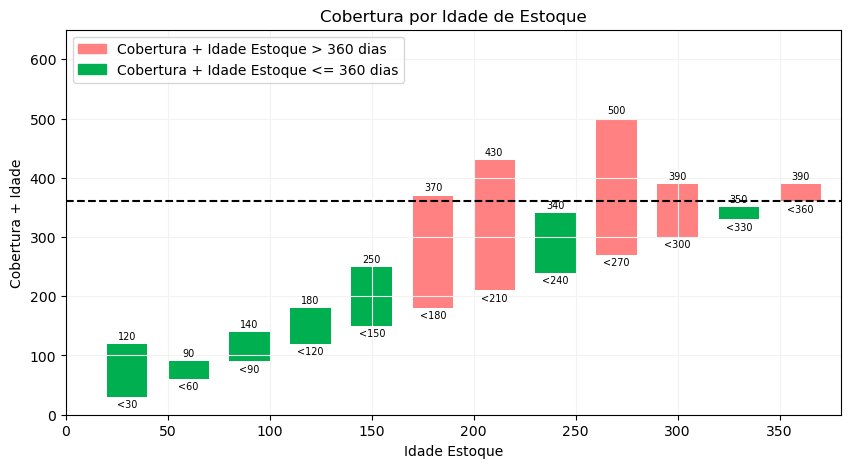

In [24]:
# Cria uma figura e eixo vazios
fig, ax = plt.subplots(figsize=(10, 5))

# Define os limites dos eixos x e y
ax.set_xlim(0, 380)
ax.set_ylim(0, 650)

# Adiciona a linha horizontal em y=360
ax.plot([0, 720], [360, 360], color='black', linestyle='--')

for line in range(0, len(df)): # Cria loop para percorrer todo o índice do DataFrame

    # Cria condicional de cor se idade + cobertura for maior que 360
    if df["idade_n"][line] + df["cobertura"][line] > 360:
        cor = "#FF8181"  # >360 Cor Vermelha
    else:
        cor = "#00B050"  # <=360 Cor Verde

    bar_width = 20  # Dimensionamento da Barra

    # Cria gráfico de barra com detalhamento dos eixos e cor
    ax.bar(df["idade_n"][line], df["cobertura"][line], width=bar_width, bottom=df["idade_n"][line], color=cor, align='center')

    text_x = df["idade_n"][line]  # Define eixo x do texto
    text_y = df["idade_n"][line] - 13  # Define eixo y do texto
    texto = df["idade_desc"][line]  # Define Texto do rótulo de dados
    ax.text(text_x, text_y, texto, ha='center', va='center', fontsize=7, color='black')  # Aplica texto no eixo (x,y) especificado

    rotulo_y = df["idade_n"][line] + df["cobertura"][line] + 13  # Define rótulo de dados
    ax.text(text_x, rotulo_y, df["cobertura"][line]+df["idade_n"][line], ha='center', va='center', fontsize=7, color='black')  # Aplica rótulo de dados no eixo (x,y) especificado

# Define os rótulos dos eixos x e y
ax.set_xlabel("Idade Estoque")  # Cria título do eixo x
ax.set_ylabel("Cobertura + Idade")  # Cria título do eixo y
ax.set_title("Cobertura por Idade de Estoque")  # Cria título do gráfico

# Cria legendas explicativas manualmente
above_360_patch = mpatches.Patch(color="#FF8181", label='Cobertura + Idade Estoque > 360 dias')
below_360_patch = mpatches.Patch(color="#00B050", label='Cobertura + Idade Estoque <= 360 dias')
plt.legend(handles=[above_360_patch, below_360_patch], loc='upper left')


# Cria grade cinza
ax.grid(True, color="#F2F2F1")

# Exibe o gráfico
plt.show()